In this tutorial we will create a series of publication quality maps using environmental datasets for the Flint Hills region in north-east Kansas.

In [1]:
# Import modules
import ee
from geemap import cartoee, colormaps
import matplotlib.pyplot as plt


In [2]:
# Initialize the library.
ee.Initialize()


## Get map for the Flint Hills region

In [21]:
# Load collections

# Ecoregions map
# https://developers.google.com/earth-engine/datasets/catalog/RESOLVE_ECOREGIONS_2017#description
eco_regions = ee.FeatureCollection("RESOLVE/ECOREGIONS/2017")

# Select flint hills region
region = eco_regions.filter(ee.Filter.inList('ECO_ID',[392])) # Find ecoregion ID using their website: https://ecoregions.appspot.com

# Define approximate region bounding box [E,S,W,N]
zoom_region = [-95.6, 36, -97.4, 40] 



## Sand map

In [22]:
# Load soilgrids dataset
sand = ee.Image("projects/soilgrids-isric/sand_mean")

# Select surface sand layer
sand_img = sand.select('sand_0-5cm_mean').clip(region).multiply(0.1) # From g/kg to %

# Select color palette
sand_vis_params = {'min':0, 'max':100, 'palette':colormaps.get_palette('YlOrBr',n_class=10)}


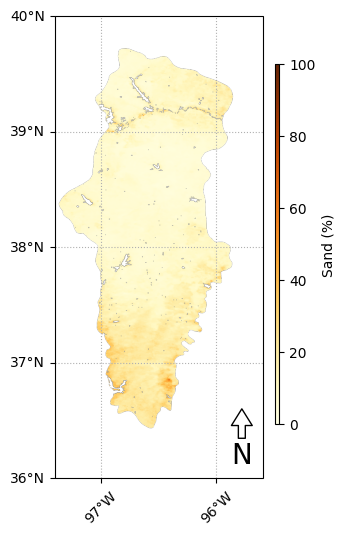

In [23]:
fig = plt.figure(figsize=(3, 6))

# plot the map over the region of interest
ax = cartoee.get_map(sand_img, vis_params=sand_vis_params, region=zoom_region)

# add the gridlines and specify that the xtick labels be rotated 45 degrees
cartoee.add_gridlines(ax, interval=1, xtick_rotation=45, linestyle=":")

# add a colorbar to the map using the visualization params we passed to the map
cax = ax.figure.add_axes([0.9,0.2,0.015,0.6])
cartoee.add_colorbar(ax, sand_vis_params, cax=cax, label="Sand (%)", orientation="vertical")
#cartoee.add_colorbar(ax, sand_vis_params, loc="bottom", label="Sand (%)", orientation="horizontal")

# Add north arrow
cartoee.add_north_arrow(ax, text="N", xy=(0.9, 0.15), text_color="black", arrow_color="white", fontsize=20)

# Save figure
#plt.savefig('flint_hills_sand.png', dpi=300)

# Display figure
plt.show()



## EVI map

In [7]:
# Load MODIS Terra collection for NDVI and EVI
modis_evi = ee.ImageCollection('MODIS/MCD43A4_006_EVI')
                 
# Modis EVI
evi_img = modis_evi.filterDate('2021-06-01', '2021-06-30').select('EVI').median().clip(region)


# Vegetation colormap
evi_palette = ['FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718', '74A901',
             '66A000', '529400', '3E8601', '207401', '056201', '004C00', '023B01',
             '012E01', '011D01', '011301']

evi_vis_params = {'min':0.0, 'max':1.0, 'palette':evi_palette}



# Create water mask.
evi_img_masked = evi_img.updateMask(evi_img.gt(0.2))


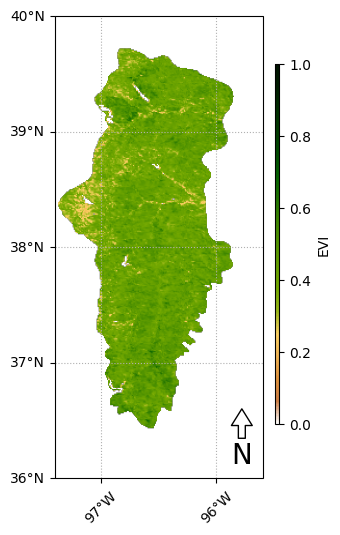

In [8]:
fig = plt.figure(figsize=(3, 6))

# plot the map over the region of interest
ax = cartoee.get_map(evi_img_masked, vis_params=evi_vis_params, region=zoom_region, dims=[200,400])

# add the gridlines and specify that the xtick labels be rotated 45 degrees
cartoee.add_gridlines(ax, interval=1, xtick_rotation=45, linestyle=":")

# add a colorbar to the map using the visualization params we passed to the map
cax = ax.figure.add_axes([0.9,0.2,0.015,0.6])
cartoee.add_colorbar(ax, evi_vis_params, cax=cax, label="EVI", orientation="vertical")

# Add north arrow
cartoee.add_north_arrow(ax, text="N", xy=(0.9, 0.15), text_color="black", arrow_color="white", fontsize=20)

# Save figure
#plt.savefig('evi_summer.png', dpi=300)

# Dsiplay figure
plt.show()


## Precipitation

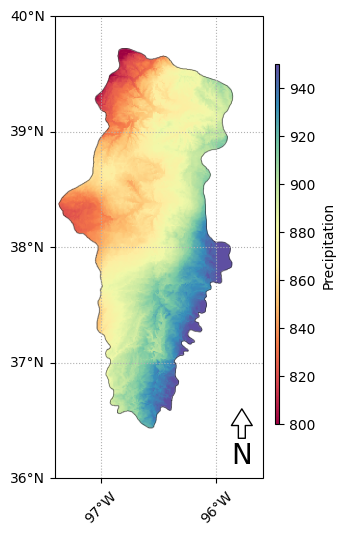

In [10]:
# Load dataset
bioclim = ee.Image('WORLDCLIM/V1/BIO').clip(region)

# Select band
precipitation = bioclim.select('bio12')

# Colormap
palette = colormaps.get_palette('Spectral',n_class=10)

# Visualization parameters
vis_params = {'min':800, 'max':950, 'palette':palette}

# Figure
fig = plt.figure(figsize=(3, 6))

# plot the map over the region of interest
ax = cartoee.get_map(precipitation, vis_params=vis_params, region=zoom_region, dims=[200,400])

cartoee.add_layer(ax=ax, ee_object=region.style(**vis_params_vector), region=zoom_region)

# add the gridlines and specify that the xtick labels be rotated 45 degrees
cartoee.add_gridlines(ax, interval=1, xtick_rotation=45, linestyle=":")

# add a colorbar to the map using the visualization params we passed to the map
cax = ax.figure.add_axes([0.9,0.2,0.015,0.6])
cartoee.add_colorbar(ax, vis_params, cax=cax, label="Precipitation", orientation="vertical")

# Add north arrow
cartoee.add_north_arrow(ax, text="N", xy=(0.9, 0.15), text_color="black", arrow_color="white", fontsize=20)

# Save figure
#plt.savefig('evi_summer.png', dpi=300)

# Display figure
plt.show()


## Air Temperature

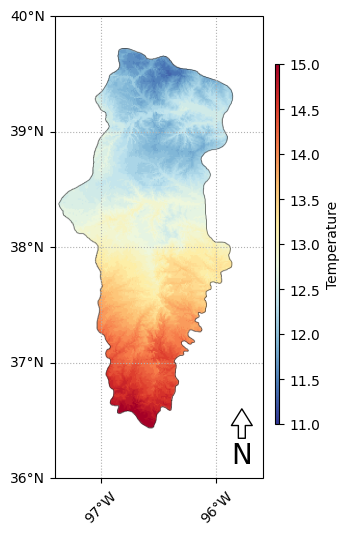

In [12]:
# Load dataset
bioclim = ee.Image('WORLDCLIM/V1/BIO').clip(region)

# Select band
temperature = bioclim.select('bio01').multiply(0.1)

# Colormap
palette = colormaps.get_palette('RdYlBu_r',n_class=10)

# Visualization parameters
vis_params = {'min':11, 'max':15, 'palette':palette}

# Figure
fig = plt.figure(figsize=(3, 6))

# plot the map over the region of interest
ax = cartoee.get_map(temperature, vis_params=vis_params, region=zoom_region, dims=[200,400])

cartoee.add_layer(ax=ax, ee_object=region.style(**vis_params_vector), region=zoom_region)

# add the gridlines and specify that the xtick labels be rotated 45 degrees
cartoee.add_gridlines(ax, interval=1, xtick_rotation=45, linestyle=":")

# add a colorbar to the map using the visualization params we passed to the map
cax = ax.figure.add_axes([0.9,0.2,0.015,0.6])
cartoee.add_colorbar(ax, vis_params, cax=cax, label="Temperature", orientation="vertical")

# Add north arrow
cartoee.add_north_arrow(ax, text="N", xy=(0.9, 0.15), text_color="black", arrow_color="white", fontsize=20)

# Save figure
#plt.savefig('evi_summer.png', dpi=300)

# Dsiplay figure
plt.show()


## Soil Organic Carbon map

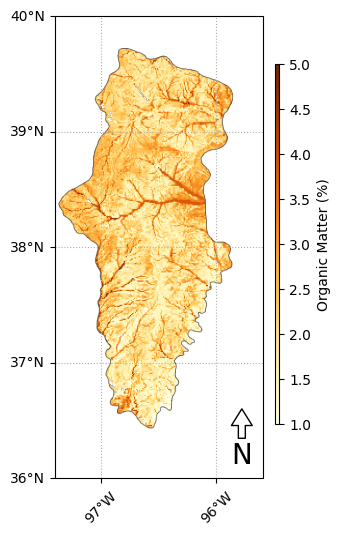

In [20]:
som = ee.Image('projects/earthengine-legacy/assets/projects/sat-io/open-datasets/CSRL_soil_properties/chemical/som').clip(region).multiply(0.1)

# Colormap
palette = colormaps.get_palette('YlOrBr',n_class=10)

# Visualization parameters
vis_params = {'min':1, 'max':5, 'palette':palette}

# Figure
fig = plt.figure(figsize=(3, 6))

# plot the map over the region of interest
ax = cartoee.get_map(som, vis_params=vis_params, region=zoom_region, dims=[200,400])

cartoee.add_layer(ax=ax, ee_object=region.style(**vis_params_vector), region=zoom_region)

# add the gridlines and specify that the xtick labels be rotated 45 degrees
cartoee.add_gridlines(ax, interval=1, xtick_rotation=45, linestyle=":")

# add a colorbar to the map using the visualization params we passed to the map
cax = ax.figure.add_axes([0.9,0.2,0.015,0.6])
cartoee.add_colorbar(ax, vis_params, cax=cax, label="Organic Matter (%)", orientation="vertical")

# Add north arrow
cartoee.add_north_arrow(ax, text="N", xy=(0.9, 0.15), text_color="black", arrow_color="white", fontsize=20)

# Save figure
#plt.savefig('evi_summer.png', dpi=300)

# Dsiplay figure
plt.show()


## Soil Textural class Map

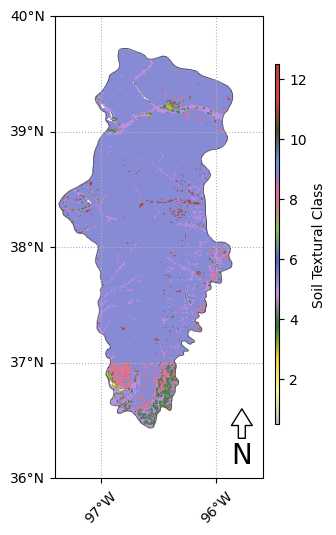

In [19]:
# Load image collection of soil textural class for the soil profile
texture_0_25 = ee.Image('projects/earthengine-legacy/assets/projects/sat-io/open-datasets/CSRL_soil_properties/physical/soil_texture_profile/texture_025').clip(region)

# Colormap
palette = ['#BEBEBE', #Sand
           '#FDFD9E', #Loamy Sand
           '#ebd834', #Sandy Loam
           '#307431', #Loam
           '#CD94EA', #Silt Loam
           '#546BC3', #Silt
           '#92C158', #Sandy Clay Loam
           '#EA6996', #Clay Loam
           '#6D94E5', #Silty Clay Loam
           '#4C5323', #Sandy Clay
           '#E93F4A', #Silty Clay
           '#AF4732', #Clay
          ]
#palette = palette[::-1]

# Visualization parameters
vis_params = {'min':0.5, 'max':12.5, 'palette':palette}

# Figure
fig = plt.figure(figsize=(3, 6))

# plot the map over the region of interest
ax = cartoee.get_map(texture_0_25, vis_params=vis_params, region=zoom_region, dims=[200,400])

cartoee.add_layer(ax=ax, ee_object=region.style(**vis_params_vector), region=zoom_region)

# add the gridlines and specify that the xtick labels be rotated 45 degrees
cartoee.add_gridlines(ax, interval=1, xtick_rotation=45, linestyle=":")

# add a colorbar to the map using the visualization params we passed to the map
cax = ax.figure.add_axes([0.9,0.2,0.015,0.6])
cartoee.add_colorbar(ax, vis_params, cax=cax, label="Soil Textural Class", orientation="vertical")

# Add north arrow
cartoee.add_north_arrow(ax, text="N", xy=(0.9, 0.15), text_color="black", arrow_color="white", fontsize=20)

# Save figure
#plt.savefig('evi_summer.png', dpi=300)

# Dsiplay figure
plt.show()
